In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import sirtipy

In [3]:
# This is an example of how to use SiRTIPY to do a radiative transfer
# calculation.

# In order to use SiRTIPY, you must define:
#   1. A region that has absorption and/or emission.
#   2. An input spectrum.
# You then use the sirtipy.radiative_transfer() function to get output spectra and
# optical depth results. You can then plot them up (spectra have a plot() method
# that is particularly useful).

# To specify the absorption and emission properties of a medium, you must define
# a function that returns appropriate values of alpha_nu (for absorption) or
# j_nu (for emission), as described in RL section 1.4.
#
# To define a python function called this_is_my_function (for example), that
# takes two arguments wibbly and wobbly, and returns wibbly+wobbly, you would
# do the following:
#
# def this_is_my_function(wibbly, wobbly):
#     return wibbly+wobbly
#
# Absorption and emission functions must take at least 3 arguments:
#    frequency
#    location
#    I_nu
# These are the frequency, location within the region, and current intensity
# spectrum along the ray. All input and output values must be in cgs units (i.e.
# frequency is in Hz, loction is in cm, I_nu is in erg/s/cm2/Hz/ster).
# Your functions may also take additional arguments, if necessary.

# For example, the following function, j_constant(), specifies a constant
# emission coefficient given by the 4th argument,jval. Note that although
# the answer does not depend on any of frequency, location, or Inu, they must
# still be specified in the function definition.
def j_constant(frequency, location, Inu, jval):
    return jval

# You will use these functions to compute monochromatic radiative transfer in a
# uniform medium, as in RL pages 11 - 14. Of course, this case has a simple
# analytic solution, but this will serve as a simple example of how the
# numerical code works.

Location 10 of 100
Location 20 of 100
Location 30 of 100
Location 40 of 100
Location 50 of 100
Location 60 of 100
Location 70 of 100
Location 80 of 100
Location 90 of 100
Location 100 of 100


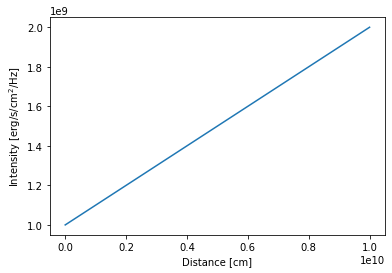

In [4]:
# PART A: EMISSION ONLY
# Compute radiative transfer through a uniform non-absorbing medium a distance
# 1e10 cm that has a constant emission coefficient of 0.1 erg/s/cm3/Hz/ster.
# 1. Define the region, and call it "medium_a".
medium_a = sirtipy.region()

# 2. Use the emission function j_constant, using a value of 0.1 erg/s/cm3/Hz/ster.
#    The add_emission_func (and add_absorption_func) functions can pass extra
#    arguments after the required set of frequency, location, Inu, by putting
#    them in a "tuple" (enclosed in parentheses with a comma at the end), such
#    as "(0.1,)" in the following example -- this becomes jval when j_constant
#    is called.
j_a = 0.1
medium_a.add_emission_func(j_constant, (j_a,))

# 3. Define a frequency axis called "freqaxis_a" for the radiative transfer. In this example, there
#    is no frequency dependence, so there is no reason to use more than one
#    frequency and it doesn't matter what its value is, so we will arbitrarily
#    set it to 1e14 Hz (approximately 3 microns).
#    Note here that we are using the astropy Quantity object to specify a value
#    that has units.
freqaxis_a = sirtipy.frequency_axis('verbatim', u.Quantity(1e14, u.Hz))

# 4. Define the input spectrum "inspec_a" based on that frequency axis. We will assume an
#    input intensity of 1e9 erg/s/cm2/Hz/ster.
inspec_a = sirtipy.spectrum('verbatim', frequencies=freqaxis_a, intensities=[1e9])

# 5. Define the axis along which the radiative transfer will go, in this case
#    from 0 to 1e10 cm, and a stepsize for the finite difference equation. The
#    stepsize should be a small fraction of the total distance, so let's use
#    1e8 cm.
s_a = [0., 1e10]
ds = 1e8

# 6. Calculate the radiative transfer.
specarray_a, tau_a, location_a = sirtipy.radiative_transfer(medium_a, inspec_a,
        s_a, ds, printevery=10)

# Now plot the result: intensity as a function of distance along the ray.
# 1. Create a figure.
plt.figure()
# 2. Plot location vs. intensity.
plt.plot(location_a, specarray_a.intensities())
# 3. Label the plot.
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
# 4. Save it to a file called 1a.png
plt.savefig('1a.png')

Location 10 of 100
Location 20 of 100
Location 30 of 100
Location 40 of 100
Location 50 of 100
Location 60 of 100
Location 70 of 100
Location 80 of 100
Location 90 of 100
Location 100 of 100


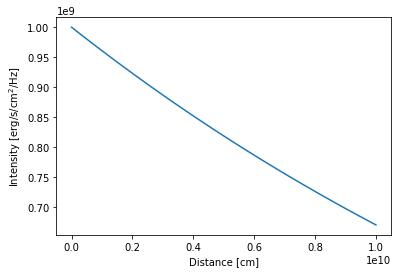

In [5]:
# PART B: ABSORPTION ONLY
# Do the same as in Part A, but with only absorption instead, using a constant
# absorption coefficient of 4e-11 cm^-1.
# 1. Define a function alpha_constant() that is analogous to j_constant,
#    and returns a constant absorption coefficient give by the 4th argument
#    alphaval:
def alpha_constant(frequency, location, Inu, alphaval):
# FIXME: FINISH THIS FUNCTION. LOOK AT THE DEFINITION OF j_constant FOR
# GUIDANCE.
    return(alphaval)

# 2. Define the region, and add the absorption function with a value of 4e-11.
#    Note that we are using variables with "_b" instead of "_a" to distinguish
#    them.
medium_b = sirtipy.region()
# FIXME: FINISH THE FOLLOWING LINE. LOOK AT THE PLACE WHERE THE EMISSION
# FUNCTION IS ADDED IN PART A FOR GUIDANCE.
alpha_b = 4e-11
medium_b.add_absorption_func(alpha_constant, (alpha_b,))
                             
# 3. Define the frequency axis, initial intensity, integration range, and
#    stepsize as above.
freqaxis_b = sirtipy.frequency_axis('verbatim', u.Quantity(1e14, u.Hz))
inspec_b = sirtipy.spectrum('verbatim', frequencies=freqaxis_b,
       intensities=[1e9])
s_b = [0., 1e10]
ds = 1e8

# 4. Calculate the radiative transfer.
# FIXME: FINISH THE FOLLOWING LINE. LOOK AT THE PLACE WHERE THE RADIATIVE
# TRANFSER IS COMPUTED IN PART A FOR GUIDANCE, MAKING SURE TO USE THE _b
# VARIABLES WHEN APPROPRIATE.
specarray_b, tau_b, location_b = sirtipy.radiative_transfer(medium_b, inspec_b,
        s_b, ds, printevery=10)
# 5. Plot the result.
plt.figure()
plt.plot(location_b, specarray_b.intensities())
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
plt.savefig('1b.png')

Location 10 of 100
Location 20 of 100
Location 30 of 100
Location 40 of 100
Location 50 of 100
Location 60 of 100
Location 70 of 100
Location 80 of 100
Location 90 of 100
Location 100 of 100
Location 10 of 100
Location 20 of 100
Location 30 of 100
Location 40 of 100
Location 50 of 100
Location 60 of 100
Location 70 of 100
Location 80 of 100
Location 90 of 100
Location 100 of 100


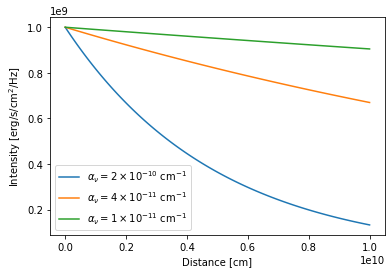

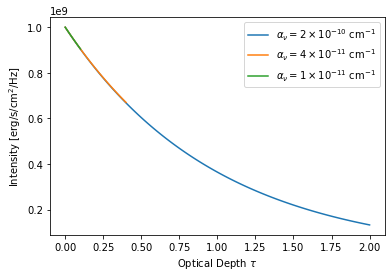

In [6]:
# PART C: DIFFERENT ABSORPTION COEFFICIENTS
# Do 3 different transfers through 3 different media with different absorption
# coefficients.
# 1. Create a medium_b1 with a constant absorption coefficient of 1e-11 cm^-1.
medium_b1 = sirtipy.region()
alpha_b1 = 1e-11
medium_b1.add_absorption_func(alpha_constant, (alpha_b1,))

# 2. Do the radiative transfer. Note that we can use the same freqaxis, inspec,
#    s, and ds as for Part B.
specarray_b1, tau_b1, location_b1 = sirtipy.radiative_transfer(medium_b1,
       inspec_b, s_b, ds, printevery=10)

# 3. Do the same for medium_b2 with a constant absorption coefficient of 2e-10 cm^-1.
medium_b2 = sirtipy.region()
# FIXME: DEFINE alpha_b2 AND ADD ITS ABSORPTION TO medium_b2.
alpha_b2 = 2e-10
medium_b2.add_absorption_func(alpha_constant, (alpha_b2,))
specarray_b2, tau_b2, location_b2 = sirtipy.radiative_transfer(medium_b2,
       inspec_b, s_b, ds, printevery=10)
                              
# 4. Overplot all of these versus location.
plt.figure()
plt.plot(location_b2, specarray_b2.intensities(), label=('$\\alpha_{\\nu}=%s$ cm$^{-1}$' % sirtipy.latex_float(alpha_b2)))
plt.plot(location_b, specarray_b.intensities(), label=('$\\alpha_{\\nu}=%s$ cm$^{-1}$' % sirtipy.latex_float(alpha_b)))
plt.plot(location_b1, specarray_b1.intensities(), label=('$\\alpha_{\\nu}=%s$ cm$^{-1}$' % sirtipy.latex_float(alpha_b1)))
plt.legend()
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
plt.savefig('1c-I_vs_s.png')
                              
# 5. Overplot all of these versus optical depth. Note that the first argument in
#    the plot() command is now tau_b etc. instead of location_b etc.
plt.figure()
plt.plot(tau_b2, specarray_b2.intensities(), label=('$\\alpha_{\\nu}=%s$ cm$^{-1}$' % sirtipy.latex_float(alpha_b2)))
plt.plot(tau_b, specarray_b.intensities(), label=('$\\alpha_{\\nu}=%s$ cm$^{-1}$' % sirtipy.latex_float(alpha_b)))
plt.plot(tau_b1, specarray_b1.intensities(), label=('$\\alpha_{\\nu}=%s$ cm$^{-1}$' % sirtipy.latex_float(alpha_b1)))
plt.legend()
plt.xlabel('Optical Depth $\\tau$')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
plt.savefig('1c-I_vs_tau.png')

Location 10 of 50
Location 20 of 50
Location 30 of 50
Location 40 of 50
Location 50 of 50


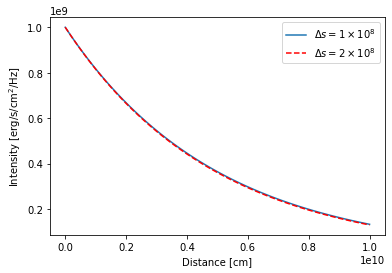

In [7]:
# PART D: THE EFFECT OF THE STEP SIZE
# Redo the medium_b2 calculation from above, with increasing values of the
# stepsize ds. At what point does the code stop providing a good solution? Why?
# FIXME: TRY DIFFERENT VALUES FOR dsbig HERE UNTIL THE ANSWER CHANGES
# SIGNIFICANTLY.
dsbig = 2e8
specarray_dsbig, tau_dsbig, location_dsbig = sirtipy.radiative_transfer(medium_b2,
       inspec_b, s_b, dsbig, printevery=10)
plt.figure()
plt.plot(location_b2, specarray_b2.intensities(), label=('$\\Delta s=%s$' % sirtipy.latex_float(ds)))
plt.plot(location_dsbig, specarray_dsbig.intensities(), 'r--',
   label=('$\\Delta s=%s$' % sirtipy.latex_float(dsbig)))
plt.legend()
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
# FIXME: TO CHANGE THE NAME OF THE OUTPUT FILE, MODIFY THE FOLLOWING LINE.
plt.savefig('1d-dsbig-2e8.png')

Location 10 of 100
Location 20 of 100
Location 30 of 100
Location 40 of 100
Location 50 of 100
Location 60 of 100
Location 70 of 100
Location 80 of 100
Location 90 of 100
Location 100 of 100


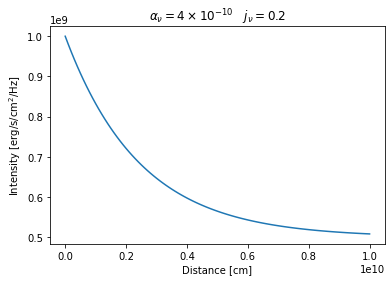

In [30]:
# PART E: EMISSION AND ABSORPTION
# Run a calculation that has both emission and absorption. Pick coefficients
# such that you expect to see the effects of both within 1e10 cm.
medium_d = sirtipy.region()
# FIXME: PLAY WITH THE VALUES OF alpha_d AND j_d BELOW TO EXPLORE HOW THE
# INTENSITY PLOT CHANGES.
alpha_d = 4e-10
j_d = 0.2
medium_d.add_absorption_func(alpha_constant, (alpha_d,))
medium_d.add_emission_func(j_constant, (j_d,))
freqaxis_d = sirtipy.frequency_axis('verbatim', u.Quantity(1e14, u.Hz))
inspec_d = sirtipy.spectrum('verbatim', frequencies=freqaxis_b,
       intensities=[1e9])
s_d = [0., 1e10]
specarray_d, tau_d, location_d = sirtipy.radiative_transfer(medium_d, inspec_d,
       s_d, ds, printevery=10)
plt.figure()
plt.plot(location_d, specarray_d.intensities())
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
plt.title('$\\alpha_{\\nu} = %s$   $j_{\\nu} = %s$' % (sirtipy.latex_float(alpha_d), sirtipy.latex_float(j_d)))
# FIXME: TO CHANGE THE NAME OF THE OUTPUT FILE, MODIFY THE FOLLOWING LINE.
plt.savefig('1e.png')

Location 10 of 100
Location 20 of 100
Location 30 of 100
Location 40 of 100
Location 50 of 100
Location 60 of 100
Location 70 of 100
Location 80 of 100
Location 90 of 100
Location 100 of 100


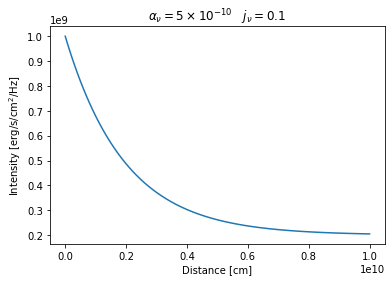

In [8]:
# PART E: EMISSION AND ABSORPTION
# Run a calculation that has both emission and absorption. Pick coefficients
# such that you expect to see the effects of both within 1e10 cm.
medium_d = sirtipy.region()
# FIXME: PLAY WITH THE VALUES OF alpha_d AND j_d BELOW TO EXPLORE HOW THE
# INTENSITY PLOT CHANGES.
alpha_d = 5e-10
j_d = 0.1
medium_d.add_absorption_func(alpha_constant, (alpha_d,))
medium_d.add_emission_func(j_constant, (j_d,))
freqaxis_d = sirtipy.frequency_axis('verbatim', u.Quantity(1e14, u.Hz))
inspec_d = sirtipy.spectrum('verbatim', frequencies=freqaxis_b,
       intensities=[1e9])
s_d = [0., 1e10]
specarray_d, tau_d, location_d = sirtipy.radiative_transfer(medium_d, inspec_d,
       s_d, ds, printevery=10)
plt.figure()
plt.plot(location_d, specarray_d.intensities())
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
plt.title('$\\alpha_{\\nu} = %s$   $j_{\\nu} = %s$' % (sirtipy.latex_float(alpha_d), sirtipy.latex_float(j_d)))
# FIXME: TO CHANGE THE NAME OF THE OUTPUT FILE, MODIFY THE FOLLOWING LINE.
plt.savefig('1e-alpha_d-5e-10-j_d-1e-1.png')

Location 10 of 50
Location 20 of 50
Location 30 of 50
Location 40 of 50
Location 50 of 50


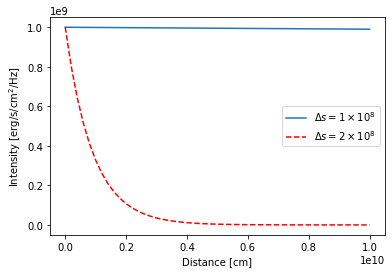

In [29]:
# PART F: THE EFFECT OF THE STEP SIZE
# Redo the medium_b2 calculation from above, with increasing values of the
# stepsize ds. At what point does the code stop providing a good solution? Why?
# FIXME: TRY DIFFERENT VALUES FOR dsbig HERE UNTIL THE ANSWER CHANGES
# SIGNIFICANTLY.
dsbig = 2e8

# Create a medium_f with a constant absorption coefficient of 1e-11 cm^-1.
medium_f = sirtipy.region()
alpha_f = 1e-12
medium_f.add_absorption_func(alpha_constant, (alpha_f,))


specarray_f, tau_f, location_f = sirtipy.radiative_transfer(medium_f,
       inspec_b, s_b, dsbig, printevery=10)
plt.figure()
plt.plot(location_f, specarray_f.intensities(), label=('$\\Delta s=%s$' % sirtipy.latex_float(ds)))
plt.plot(location_dsbig, specarray_dsbig.intensities(), 'r--',
   label=('$\\Delta s=%s$' % sirtipy.latex_float(dsbig)))
plt.legend()
plt.xlabel('Distance [cm]')
plt.ylabel('Intensity [erg/s/cm$^2$/Hz]')
# FIXME: TO CHANGE THE NAME OF THE OUTPUT FILE, MODIFY THE FOLLOWING LINE.
plt.savefig('1f-alpha_f-1e-12.png')